In [30]:
#필요한 모듈 import
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import rc

In [47]:
#고장신고 데이터 import
df1 = pd.read_csv("/Users/janghyun/Desktop/BDP/최종 정리/data/고장신고/고장신고15.12-20.10.csv")
df2 = pd.read_csv("/Users/janghyun/Desktop/BDP/최종 정리/data/고장신고/고장신고20.11-21.01.csv")
df3 = pd.read_csv("/Users/janghyun/Desktop/BDP/최종 정리/data/고장신고/고장신고21.02-21.06.csv")
df4 = pd.read_csv("/Users/janghyun/Desktop/BDP/최종 정리/data/고장신고/고장신고21.7-21.12.csv")
df5 = pd.read_csv("/Users/janghyun/Desktop/BDP/최종 정리/data/고장신고/고장신고22.01-06.csv")

In [48]:
#column명 확인
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)
print(df5.columns)

Index(['자전거번호', '등록일시', '고장구분'], dtype='object')
Index(['자전거번호', '등록일시', '고장구분'], dtype='object')
Index(['자전거번호', '등록일시', '고장구분'], dtype='object')
Index(['자전거번호', '등록일시', '고장구분'], dtype='object')
Index(['자전거번호', '등록일시', '고장구분'], dtype='object')


In [49]:
#결측치 확인
#결측치 확인
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())
print(df4.isnull().sum())
print(df5.isnull().sum())

자전거번호    0
등록일시     0
고장구분     0
dtype: int64
자전거번호    0
등록일시     0
고장구분     0
dtype: int64
자전거번호    0
등록일시     0
고장구분     0
dtype: int64
자전거번호    0
등록일시     0
고장구분     0
dtype: int64
자전거번호    0
등록일시     0
고장구분     0
dtype: int64


In [50]:
#data 길이 확인
print(len(df1))
print(len(df2))
print(len(df3))
print(len(df4))
print(len(df5))

print("총 길이: ", len(df1)+len(df2)+len(df3)+len(df4)+len(df5))

181592
6749
53843
95689
74924
총 길이:  412797


In [51]:
#데이터 합치기
data = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
data

,자전거번호,등록일시,고장구분
0,SPB-00108,2015.12.4 7:41,체인
1,SPB-00210,2015.12.7 12:23,체인
2,SPB-00035,2015.12.9 17:07,기타
3,SPB-01024,2015.12.13 21:02,기타
4,SPB-01015,2015.12.28 10:12,기타
...,...,...,...
412792,SPB-56997,2022.6.29 21:18,타이어
412793,SPB-53871,2022.6.29 22:02,체인
412794,SPB-57521,2022.6.29 22:04,안장
412795,SPB-60598,2022.6.29 22:28,단말기


In [52]:
#등록일시 type 변경
#등록일시 type 변경
data["등록일시"]=pd.to_datetime(data['등록일시'].str.strip(), format="%Y-%m-%d %H:%M", errors='coerce')
data

,자전거번호,등록일시,고장구분
0,SPB-00108,2015-12-04 07:41:00,체인
1,SPB-00210,2015-12-07 12:23:00,체인
2,SPB-00035,2015-12-09 17:07:00,기타
3,SPB-01024,2015-12-13 21:02:00,기타
4,SPB-01015,2015-12-28 10:12:00,기타
...,...,...,...
412792,SPB-56997,2022-06-29 21:18:00,타이어
412793,SPB-53871,2022-06-29 22:02:00,체인
412794,SPB-57521,2022-06-29 22:04:00,안장
412795,SPB-60598,2022-06-29 22:28:00,단말기


In [53]:
#분석시 불필요한 시간 제거
data["등록일시"] = data["등록일시"].dt.date
data["등록일시"] = pd.to_datetime(data["등록일시"])

data

,자전거번호,등록일시,고장구분
0,SPB-00108,2015-12-04,체인
1,SPB-00210,2015-12-07,체인
2,SPB-00035,2015-12-09,기타
3,SPB-01024,2015-12-13,기타
4,SPB-01015,2015-12-28,기타
...,...,...,...
412792,SPB-56997,2022-06-29,타이어
412793,SPB-53871,2022-06-29,체인
412794,SPB-57521,2022-06-29,안장
412795,SPB-60598,2022-06-29,단말기


In [80]:
#시각화 위한 year month 칼럼 추가
data["year"] = data["등록일시"].dt.year
data["month"] = data["등록일시"].dt.month

data

,자전거번호,등록일시,고장구분,year,month
0,SPB-00108,2015-12-04,체인,2015,12
1,SPB-00210,2015-12-07,체인,2015,12
2,SPB-00035,2015-12-09,기타,2015,12
3,SPB-01024,2015-12-13,기타,2015,12
4,SPB-01015,2015-12-28,기타,2015,12
...,...,...,...,...,...
412792,SPB-56997,2022-06-29,타이어,2022,6
412793,SPB-53871,2022-06-29,체인,2022,6
412794,SPB-57521,2022-06-29,안장,2022,6
412795,SPB-60598,2022-06-29,단말기,2022,6


In [82]:
#시각화 위해 일별 총 고장건수 count 칼럼 추가
data_idx = data[["등록일시", "고장구분"]]
data_idx.set_index("등록일시", inplace=True)
data_idx["c"]=data_idx.groupby("등록일시").고장구분.count()

data_type = data_idx.groupby(["등록일시", "고장구분"]).c.sum().unstack()
data_type = data_type.fillna(0)
data_type["count"]  = data_type.sum(axis=1)
data_type=data_type.astype(int)

#시각화 위한 df 생성
data_count = data_type["count"]

/var/folders/qy/_42009_n085fc984bjdc5v580000gn/T/ipykernel_17111/1665520893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_idx["c"]=data_idx.groupby("등록일시").고장구분.count()


<AxesSubplot: title={'center': 'ALL_SUM'}, xlabel='등록일시', ylabel='고장신고 건수'>

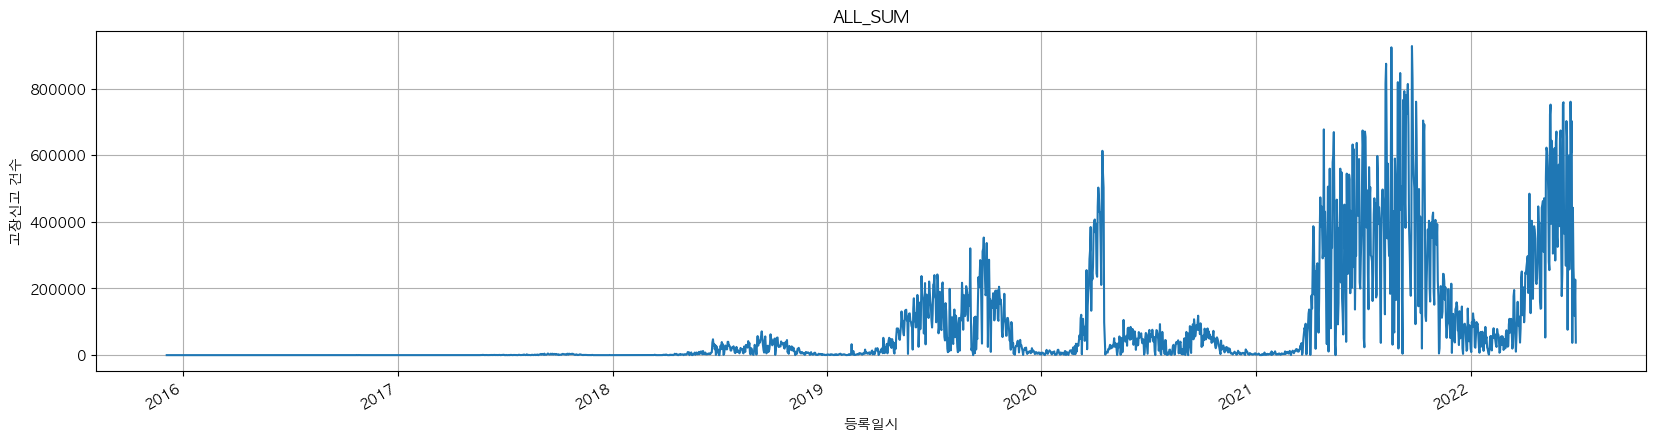

In [83]:
#전체 데이터 고장구분 sum 시각화
rc('font', family='AppleGothic')
plt.title("ALL_SUM")#데이터_고장구분
plt.xlabel("날짜")
plt.ylabel("고장신고 건수")
data_count.plot(figsize=(20, 5), grid=True)

<AxesSubplot: title={'center': '2018.6-2022.6_SUM'}, xlabel='등록일시', ylabel='고장신고 건수'>

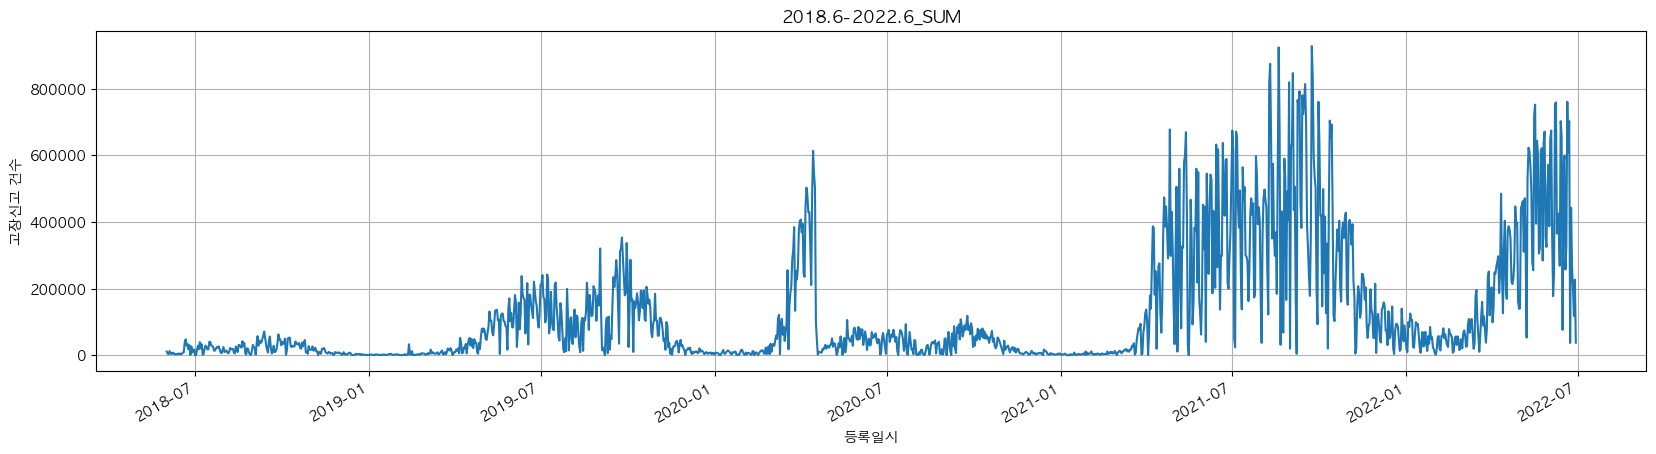

In [85]:
#고장신고가 증가하기 시작한 2018.6부터 전체 고장구분 sum 시각화
rc('font', family='AppleGothic')
plt.title("2018.6-2022.6_SUM")#데이터_고장구분
plt.xlabel("날짜")
plt.ylabel("고장신고 건수")
data_count["2018-6":].plot(figsize=(20, 5), grid=True)

<AxesSubplot: title={'center': '2018.6-2019.6_SUM'}, xlabel='등록일시', ylabel='고장신고 건수'>

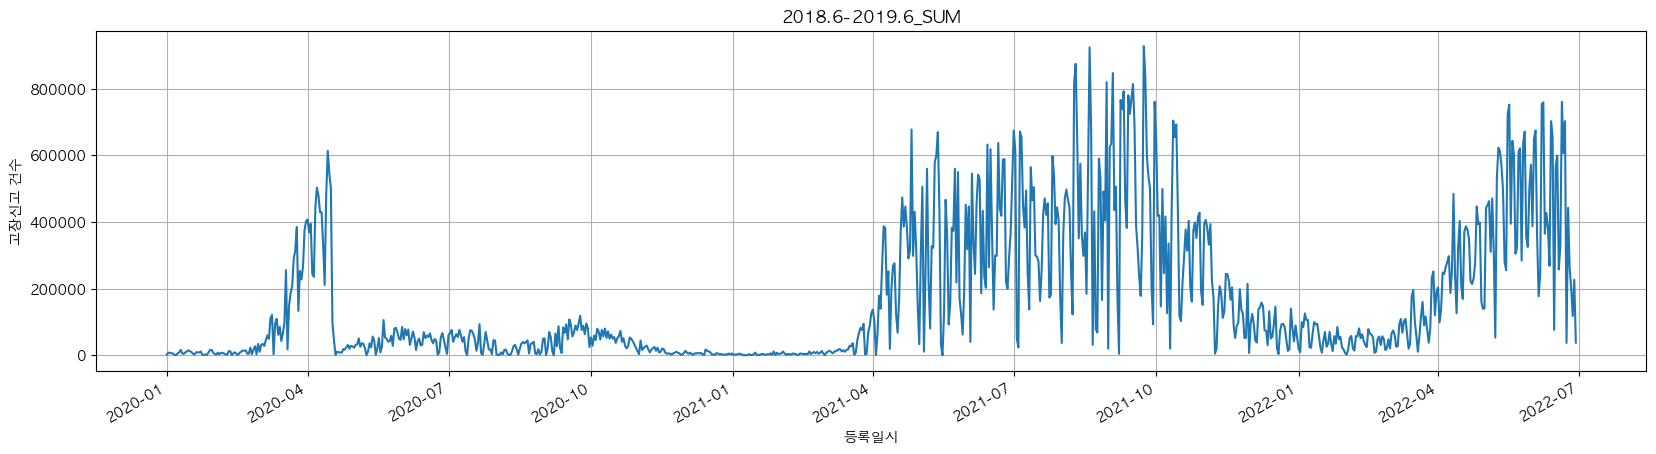

In [92]:
# train& test data 선정 위한 시각화1
rc('font', family='AppleGothic')
plt.title("2018.6-2019.6_SUM")#데이터_고장구분
plt.xlabel("날짜")
plt.ylabel("고장신고 건수")
data_count["2020-1":].plot(figsize=(20, 5), grid=True)

<AxesSubplot: title={'center': '2018.6-2019.6_SUM'}, xlabel='등록일시', ylabel='고장신고 건수'>

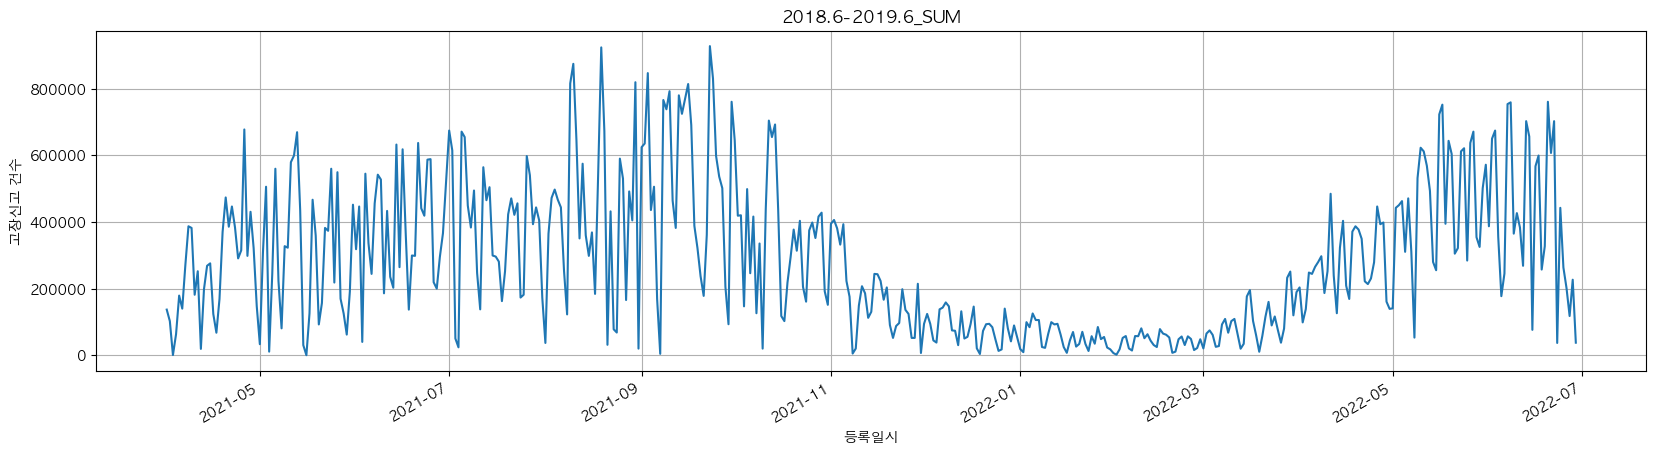

In [91]:
# train& test data 선정 위한 시각화2
rc('font', family='AppleGothic')
plt.title("2018.6-2019.6_SUM")#데이터_고장구분
plt.xlabel("날짜")
plt.ylabel("고장신고 건수")
data_count["2021-4":].plot(figsize=(20, 5), grid=True)